In [1]:
!pip install dionysus
!pip install zarr

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 23.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for dionysus: filename=dionysus-2.0.8-cp38-cp38-linux_x86_64.whl size=342680 sha256=18b2a319d9afa92bc2b2bb6272a6fccb0e1b6e8ba13ad0fa1372059f43fc7a0c
  Stored in directory: /root/.cache/pip/wheels/0e/6a/ce/a54c9248873852edfaf8e6e801db84c2d2c64f797fc07a68da
Successfully built dionysus
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 193.0/193.0 KB 6.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.7/6.7 MB 57.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for asciitree: filename=asciitree-0.3.3-py3-none-any.whl size=5050 sha256=f12ca76e8913988c3d243b23bcf3f4ac3f2df02e80023b97415de40986781e9e
  Stored in directory: /ro

In [2]:
from google.colab import drive
from google.colab import files
import os

drive.mount('/content/drive',force_remount=True)
os.chdir("/content/drive/My Drive/NASA/Fire Detection/Test Data")
!ls -ltr

Mounted at /content/drive
total 24
drwx------ 2 root root 4096 Jan 19 03:20 Tile_1_33
drwx------ 2 root root 4096 Jan 19 03:21 Tile_5_37
drwx------ 2 root root 4096 Jan 21 00:56 Tile_0_8
drwx------ 2 root root 4096 Jan 23 23:39 Tile_2_6
drwx------ 2 root root 4096 Jan 23 23:40 Tile_17_32
drwx------ 2 root root 4096 Jan 25 01:24 Tile_13_37


In [3]:
import zarr
import seaborn as sns
import numpy as np
import scipy
import pandas as pd
import dionysus as d
import matplotlib.pyplot as plt
sns.set_theme()
from PIL import Image


In [385]:
fname2 = 'Tile_13_37'

rawFileList = os.listdir(fname2)
print (rawFileList)

['Tile_13_37.csv', 'Tile_13_37_s20192201851196.zarr', 'Tile_13_37_s20192210221197.zarr', 'Tile_13_37_s20192192026196.zarr', 'Tile_13_37_s20192201931196.zarr', 'Tile_13_37_s20192200236197.zarr', 'Tile_13_37_s20192210116197.zarr', 'Tile_13_37_s20192200056197.zarr', 'Tile_13_37_s20192210121197.zarr', 'Tile_13_37_s20192192041196.zarr', 'Tile_13_37_s20192192006196.zarr', 'Tile_13_37_s20192191931196.zarr', 'Tile_13_37_s20192182151196.zarr', 'Tile_13_37_s20192191956196.zarr', 'Tile_13_37_s20192181926196.zarr', 'Tile_13_37_s20192181816196.zarr', 'Tile_13_37_s20192182036196.zarr', 'Tile_13_37_s20192191821196.zarr']


In [386]:
dfLabel = pd.read_csv(fname2 + '//' + rawFileList[0])
dfLabel['name'] = dfLabel.apply(lambda row: row.scene.split('_')[3], axis=1)
label = dfLabel.loc[dfLabel['name'] == 's20192210221197', 'fire'].iloc[0]
print (label)

0


s20192191931196 1


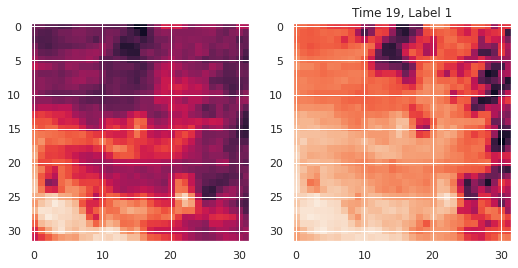

In [412]:
timeSeriesName = rawFileList[1:]
fig= plt.figure(figsize=(18,12))

#usefulChannel = [2, 4, 5, 6]
usefulChannel = [6, 13]

seriesName = timeSeriesName[10]

seriesStartTime = seriesName.split('_')[3].split('.')[0]
label = dfLabel.loc[dfLabel['name'] == seriesStartTime, 'fire'].iloc[0]
print (seriesStartTime[:], label)
for channelNum in range(len(usefulChannel)):
    ax = fig.add_subplot(1,4,1+channelNum)
    # ax.title.set_text(timeSeriesName[0].split('_')[3])
    tileNum = np.array(zarr.open(fname2 + '//' + seriesName)[:, :, usefulChannel[channelNum]])
    #tileNum = (tileNum - np.min(tileNum))/(np.max(tileNum) - np.min(tileNum))
    ax.imshow(tileNum)

plt.title("Time {}, Label {}".format(seriesStartTime[8:10], label))
plt.show()

[[1.0464952  1.05275261 0.99174303 ... 1.06839609 1.29209828 1.26237571]
 [1.03085172 0.9714064  0.95889163 ... 1.12314844 1.15287113 1.054317  ]
 [0.98705    0.95106989 0.9541986  ... 1.10124755 0.97766382 1.02146566]
 ...
 [1.58306766 1.88342297 1.94912577 ... 1.26081133 1.20293033 1.12471282]
 [1.42819691 1.63781989 1.81772029 ... 1.19510853 1.14661372 1.20605898]
 [1.36092973 1.47982049 1.58150327 ... 1.25768256 1.21857381 1.16538584]]
[]
1


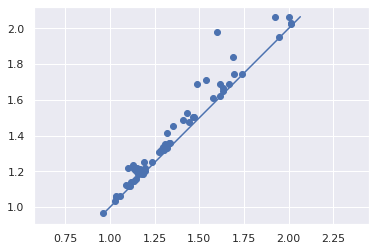

In [413]:
channel7 = np.array(zarr.open(fname2 + '//' + seriesName)[:, :, 6])
#channel7New = (channel7 - np.mean(channel7)) / np.std(channel7)
print (channel7)
print (np.argwhere(channel7 > np.mean(channel7) + 3 * np.std(channel7)))
print (label)

f_lower_star = d.fill_freudenthal(channel7)
p = d.homology_persistence(f_lower_star)
dgms = d.init_diagrams(p, f_lower_star)
#d.plot.plot_diagram(dgms[0])
d.plot.plot_diagram(dgms[1])

In [20]:
# for pre
timeSeriesNameNew = []
channelSlct = [0,1,2,3,4,5]
for i in channelSlct:
    timeSeriesNameNew.append(timeSeriesName[i])


In [380]:
usefulChannel = [6, 13]
tileList = rawFileList[1:]

channelDiff = []
for i in range(len(tileList)):
    channel7 = np.array(zarr.open(fname2 + '//' + tileList[i])[:, :, usefulChannel[0]])
    channel14 = np.array(zarr.open(fname2 + '//' + tileList[i])[:, :, usefulChannel[1]])
    channel7 = (channel7 - np.min(channel7)) / (np.max(channel7) - np.min(channel7)) # normalize data
    channel14 = (channel14 - np.min(channel14)) / (np.max(channel14) - np.min(channel14))
    channelDiff.append(channel7 - channel14)


In [384]:
#channel7 = np.array(zarr.open(fname2 + '//' + seriesName)[:, :, 6])

print (channelDiff[0])
print (np.argwhere(channelDiff[0]>0))
print (label)

#f_lower_star = d.fill_freudenthal(channel7)
#p = d.homology_persistence(f_lower_star)
#dgms = d.init_diagrams(p, f_lower_star)
#d.plot.plot_diagram(dgms[0])
#d.plot.plot_diagram(dgms[1])

[[-0.40605278 -0.42185321 -0.43293745 ... -0.27359725 -0.11931159
  -0.19216309]
 [-0.42775102 -0.43651178 -0.44794038 ...  0.03285717 -0.16732077
  -0.23882969]
 [-0.43365469 -0.45445788 -0.45240394 ... -0.15293174 -0.30932877
  -0.36784847]
 ...
 [-0.17454399 -0.08636813 -0.05181293 ... -0.28239249 -0.23480205
  -0.25701094]
 [-0.2757316  -0.18846817 -0.10923107 ... -0.31532424 -0.30979351
  -0.29923707]
 [-0.29278828 -0.265984   -0.21633393 ... -0.30968453 -0.31880098
  -0.33309811]]
[[ 0 19]
 [ 1 19]
 [ 1 26]
 [ 1 29]
 [ 5 28]
 [ 6 28]
 [ 9 29]
 [10 29]
 [17 31]
 [26  3]]


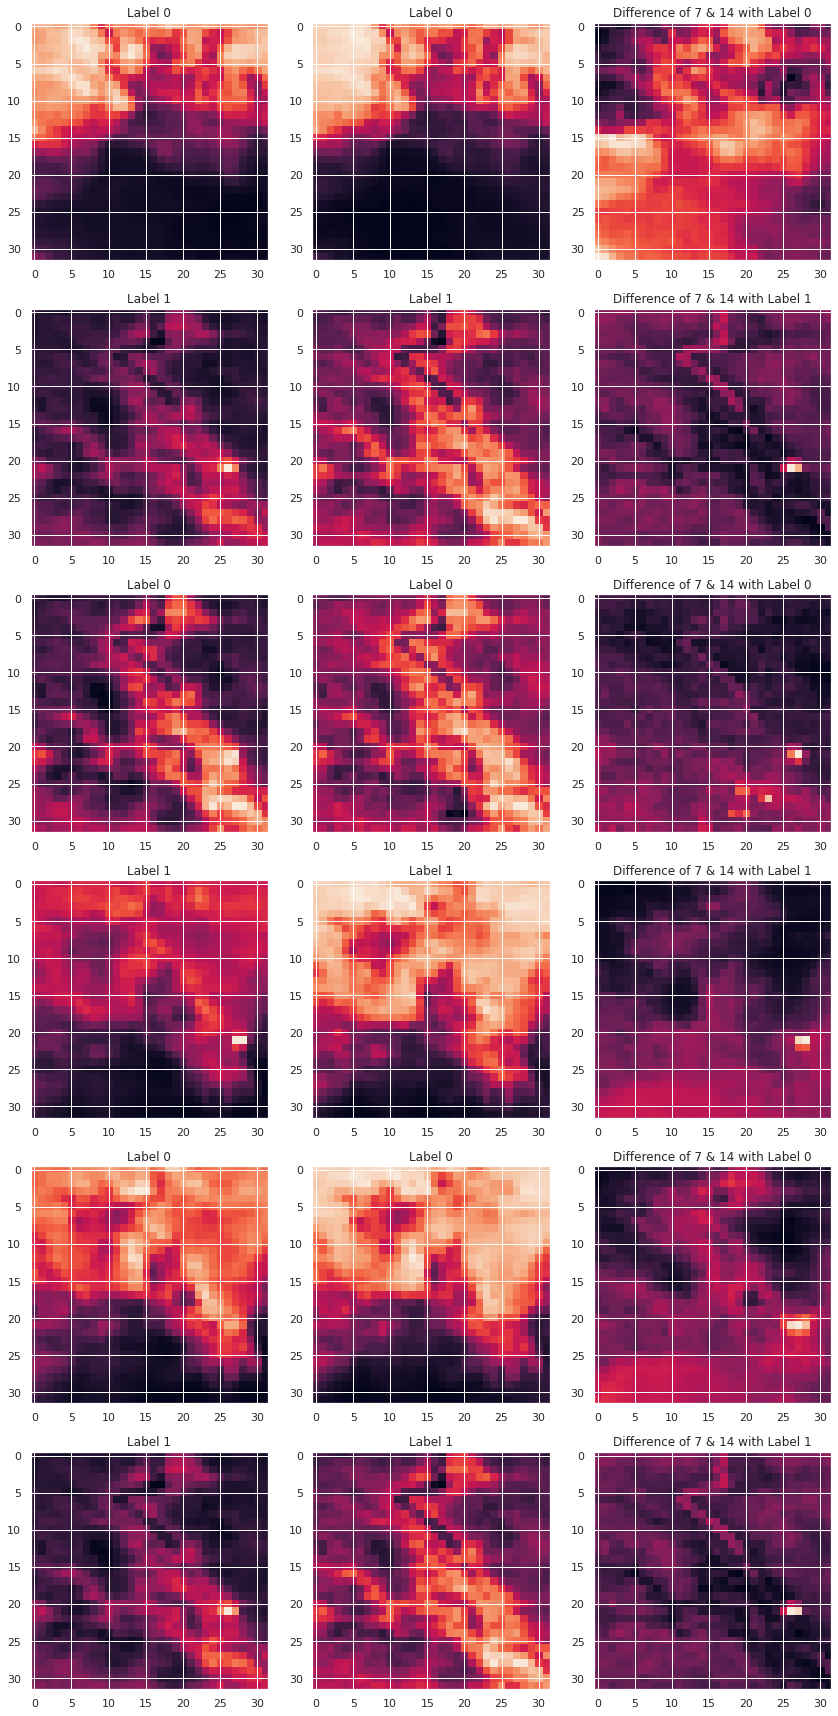

In [22]:
fig, axs = plt.subplots(len(timeSeriesNameNew), len(usefulChannel) + 1, figsize=(12, 24))

for i in range(len(timeSeriesNameNew)):
    for j in range(len(usefulChannel) + 1):
        if j != 2:
            tileNum = np.array(zarr.open(fname2 + '//' + timeSeriesNameNew[i])[:, :, usefulChannel[j]])
            axs[i, j].imshow(tileNum)
            seriesStartTime = timeSeriesNameNew[i].split('_')[3].split('.')[0]
            label = dfLabel.loc[dfLabel['name'] == seriesStartTime, 'fire'].iloc[0]
            axs[i, j].title.set_text('Label {}'.format(label))
        if j == 2:
            axs[i, j].imshow(channelDiff[channelSlct[i]])
            seriesStartTime = timeSeriesNameNew[i].split('_')[3].split('.')[0]
            label = dfLabel.loc[dfLabel['name'] == seriesStartTime, 'fire'].iloc[0]
            axs[i, j].title.set_text('Difference of 7 & 14 with Label {}'.format(label))

plt.tight_layout()


In [344]:
#Convert Radiance to Temperature

def Rad2Tem(I, waveLength):
    k = 1.380649e-23
    h = 6.62607015e-34
    c = 299792458
    waveLegnthInMeter = waveLength * 1e-6
    v = c / waveLegnthInMeter
    
    a = h*v/k
    b = 1/np.log(1 + (2*h*v*v*v)/(I*c*c))

    T = a*b

    return np.log(1 + (2*h*v*v*v)/(I*c*c))


In [330]:
def test(I, waveLength):
    k = 1.380649e-23
    h = 6.62607015e-34
    c = 299792458
    waveLegnthInMeter = waveLength * 1e-6
    a = (h*c) / (k * waveLegnthInMeter) 
    b = (2*h*c*c) / (I * waveLegnthInMeter ** 5)
    c = 1 / np.log(1 + b)
    T = a * c
    return T

In [333]:
print (test(100, 3.9))

175.66673734624658


In [345]:
print (Rad2Tem(1, 3.9))

6.697502752171412e-09
